# CREDIT CARD LEAD PREDICTION

In [ ]:
Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.

The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 

In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

## GETTING LIBRARIES

In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"SkLearn version : SkLearn {sklearn.__version__}")
# Magic Functions for In-Notebook Display
%matplotlib inline
# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

## Load Data

In [2]:
train = pd.read_csv('train.csv', encoding='latin_1')
# Converting all column names to lower case
train.columns = train.columns.str.lower()
train

,id,gender,age,region_code,occupation,channel_code,vintage,credit_product,avg_account_balance,is_active,is_lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


LETS CHECK FOR DUPLICATES


In [3]:
train['id'].nunique() #SINCE THERE ARE 245725 ROWS WE ARE SAFE FROM DUPLICATES!

245725

In [4]:
test = pd.read_csv('test.csv', encoding='latin_1')
# Converting all column names to lower case
test.columns = test.columns.str.lower()
test.head()

,id,gender,age,region_code,occupation,channel_code,vintage,credit_product,avg_account_balance,is_active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
train.describe()

,age,vintage,avg_account_balance,is_lead
count,245725.00,245725.00,245725.00,245725.00
mean,43.86,46.96,1128403.10,0.24
std,14.83,32.35,852936.36,0.43
min,23.00,7.00,20790.00,0.00
25%,30.00,20.00,604310.00,0.00
50%,43.00,32.00,894601.00,0.00
75%,54.00,73.00,1366666.00,0.00
max,85.00,135.00,10352009.00,1.00


In [6]:
test.describe()

,age,vintage,avg_account_balance
count,105312.00,105312.00,105312.00
mean,43.87,46.84,1134194.63
std,14.87,32.27,866242.99
min,24.00,7.00,22597.00
25%,30.00,20.00,603982.25
50%,43.00,32.00,896634.50
75%,54.00,73.00,1371598.25
max,85.00,135.00,9908858.00


If you notice, age and vintage have quite common stats in both train and test data.

## Exploratory Data Analysis


In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   gender               245725 non-null  int32
 1   age                  245725 non-null  int32
 2   occupation           245725 non-null  int32
 3   channel_code         245725 non-null  int32
 4   vintage              245725 non-null  int32
 5   credit_product       245725 non-null  int32
 6   avg_account_balance  245725 non-null  int32
 7   is_active            245725 non-null  int32
 8   is_lead              245725 non-null  int64
dtypes: int32(8), int64(1)
memory usage: 9.4 MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   105312 non-null  object
 1   gender               105312 non-null  object
 2   age                  105312 non-null  int64 
 3   region_code          105312 non-null  object
 4   occupation           105312 non-null  object
 5   channel_code         105312 non-null  object
 6   vintage              105312 non-null  int64 
 7   credit_product       92790 non-null   object
 8   avg_account_balance  105312 non-null  int64 
 9   is_active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


Lets check for Null Values in both train and test

<AxesSubplot:>

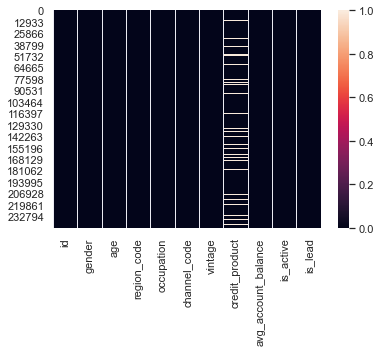

In [9]:
sns.heatmap(train.isnull()) 
# Seems like Credit_Product has some!

<AxesSubplot:>

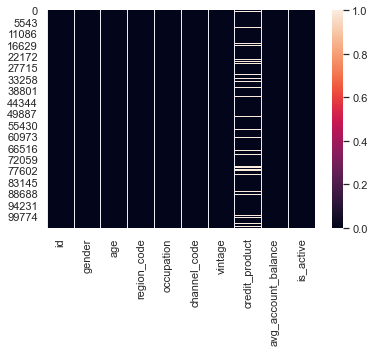

In [10]:
sns.heatmap(test.isnull()) 
# Seems like Credit_Product has some!

Highlights

*   Dataset contains details of 245725 transactions with 31 features.
*   Except for credit_product which contains 216400 rows, there is no missing data in our dataset, every column contain exactly 245725 rows
*   Except for id which is nothing but like a primary, rest all features can be analysed!
*   Similarly except for number of rows everything is quite similar in test data
*   Instead of imputuing, droping the NaN values in credit_product, lets just assign a third category to them in both train and test data, which is notassigned







In [11]:
train['credit_product'].fillna('notassigned', inplace=True)
test['credit_product'].fillna('notassigned', inplace=True)

Now, Count unique values of label


In [12]:
print(train['is_lead'].value_counts())
print('\n')
print(train['is_lead'].value_counts(normalize=True))

0    187437
1     58288
Name: is_lead, dtype: int64


0   0.76
1   0.24
Name: is_lead, dtype: float64


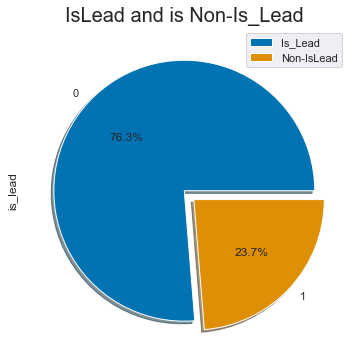

In [13]:
# train['credit_product'].fillna('NotMentioned', inplace=True)
train["is_lead"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("IsLead and is Non-Is_Lead",fontsize=20)
plt.legend(["Is_Lead", "Non-IsLead"])
plt.show()

Highlights

This dataset has 58288 Non-Is_Lead and 187437 Is_Lead. The dataset is unbalanced, the positive class (Is_Lead) account for 23.7% of all data. Most of the data are Is_Lead. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most data are Is_Lead. But we don't want our model to assume, we want our model to detect patterns that predicts whether the person will be the lead or not based on the given details of the person.

Getting all the numeric terms:

In [14]:
col = list(train.columns)
text = ('id', 'channel_code', 'is_active','gender', 'region_code', 'occupation', 'credit_product', 'is_lead')
for i in text:
  col.remove(i)
col

['age', 'vintage', 'avg_account_balance']

Plotting the distribution of all numeric columns

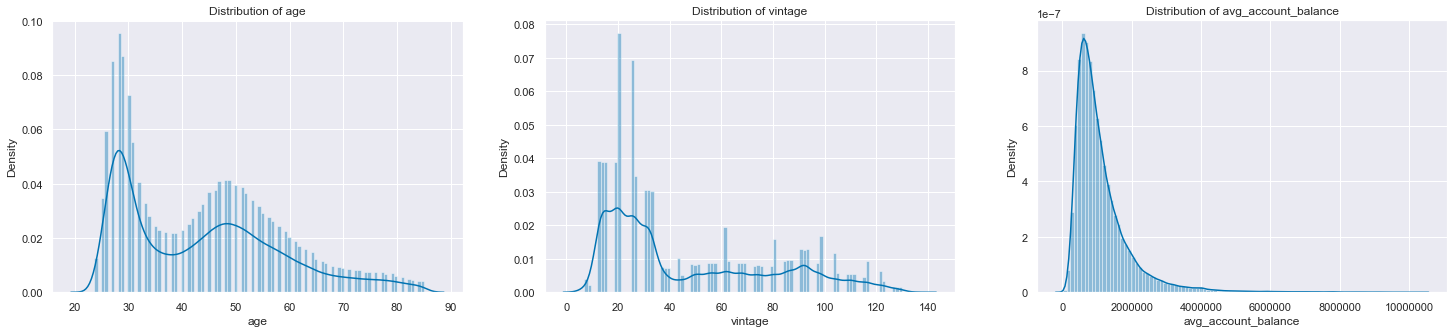

In [15]:
fig, axs = plt.subplots(ncols=3,figsize=(25,5))
j = 0
for i in col:
  axs[j].set_title("Distribution of {c}".format(c=i))
  sns.distplot(train[i], bins=100, ax=axs[j])
  j=j+1
  plt.ticklabel_format(style='plain', axis='x')
plt.show()

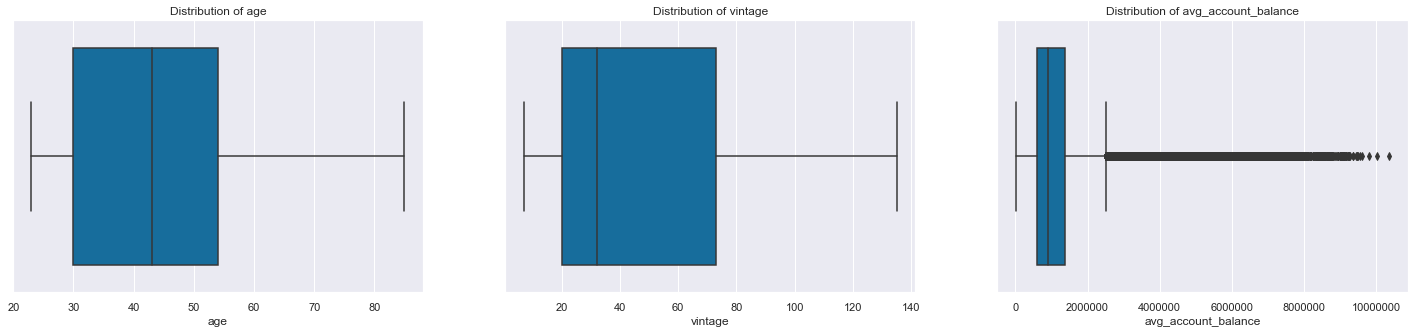

In [16]:
fig, axs = plt.subplots(ncols=3,figsize=(25,5))
j = 0
for i in col:
  axs[j].set_title("Distribution of {c}".format(c=i))
  sns.boxplot(train[i], ax=axs[j])
  j=j+1
  plt.ticklabel_format(style='plain', axis='x')
plt.show()

*Looks like we have some outliers in avg_account_balance. Lets see at the boxplots of all the features with respect to class.*

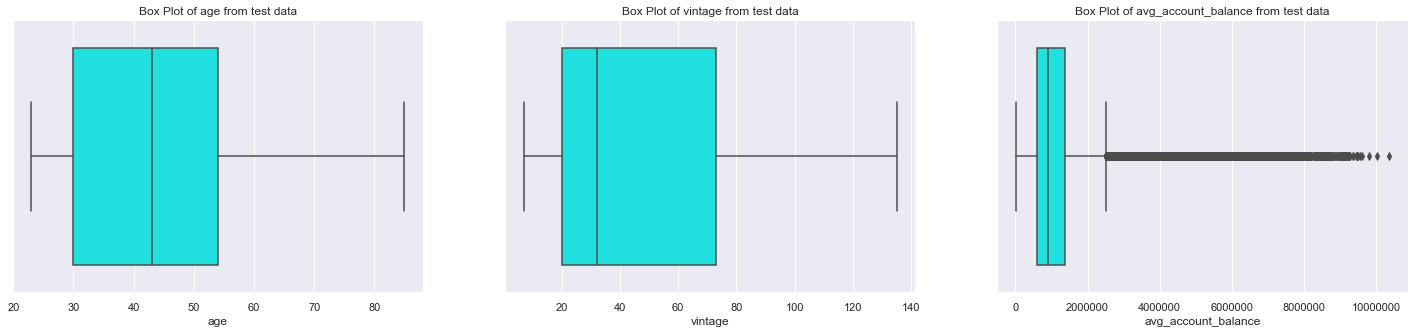

In [17]:
fig, axs = plt.subplots(ncols=3,figsize=(25,5))
j = 0
for i in col:
  axs[j].set_title("Box Plot of {c} from test data".format(c=i))
  sns.boxplot(train[i], ax=axs[j], color='cyan')
  j=j+1
  plt.ticklabel_format(style='plain', axis='x')
plt.show()


Now, since we dont want these outliers to affect models performance, lets get rid of them.

In [18]:
train.describe()

,age,vintage,avg_account_balance,is_lead
count,245725.00,245725.00,245725.00,245725.00
mean,43.86,46.96,1128403.10,0.24
std,14.83,32.35,852936.36,0.43
min,23.00,7.00,20790.00,0.00
25%,30.00,20.00,604310.00,0.00
50%,43.00,32.00,894601.00,0.00
75%,54.00,73.00,1366666.00,0.00
max,85.00,135.00,10352009.00,1.00


SINCE SIMILAR PATTERN OF OUTLIERS ARE NOTICED IN BOTH TRAINING AND TESTING DATA, SO LETS JUST CONVERT THE CONTINUOUS FEATURES IN A PARTICULAR RANGE RATHER THEN DROPPING OUTLIERS.

In [19]:
age = test['age'].values
nage = []
vintage = test['vintage'].values
nvintage = []
avg_account_balance = test['avg_account_balance'].values
navg_account_balance = []
for i in age:
  i = int(i)
  if i>=23 and i<=30:
    nage.append('agerange1')
  if i>30 and i<=43:
    nage.append('agerange2')
  if i>43 and i<=54:
    nage.append('agerange3')
  if i>54 and i<=85:
    nage.append('agerange4')
  if i>85:
    nage.append('agerange5')
for j in vintage:
  j = int(j)
  if j>=7 and j<=20:
    nvintage.append('vintageagerange1')
  if j>20 and j<=32:
    nvintage.append('vintageagerange2')
  if j>32 and j<=73:
    nvintage.append('vintageagerange3')
  if j>73 and j<=135:
    nvintage.append('vintageagerange4')
  if j>135:
    nvintage.append('vintageagerange5')
for k in avg_account_balance:
  k = int(k)
  if k>=20790 and k<=604310:
    v = 'balancerange1'
    navg_account_balance.append(v)
  if k>604310 and k<=894601:
    v = 'balancerange2'
    navg_account_balance.append(v)
  if k>894601 and k<=1366666:
    v = 'balancerange3'
    navg_account_balance.append(v)
  if k>1366666 and k<=10352009:
    v = 'balancerange4'
    navg_account_balance.append(v)
  if k>10352009:
    v = 'balancerange5'
    navg_account_balance.append(v)

In [20]:
test['age']=nage
test['vintage']=nvintage
test['avg_account_balance']=navg_account_balance
test

,id,gender,age,region_code,occupation,channel_code,vintage,credit_product,avg_account_balance,is_active
0,VBENBARO,Male,agerange1,RG254,Other,X1,vintageagerange2,Yes,balancerange2,No
1,CCMEWNKY,Male,agerange2,RG268,Other,X2,vintageagerange3,notassigned,balancerange3,No
2,VK3KGA9M,Male,agerange2,RG270,Salaried,X1,vintageagerange1,No,balancerange1,No
3,TT8RPZVC,Male,agerange1,RG272,Other,X1,vintageagerange3,No,balancerange2,No
4,SHQZEYTZ,Female,agerange1,RG270,Other,X1,vintageagerange1,No,balancerange2,No
...,...,...,...,...,...,...,...,...,...,...
105307,DBENJOYI,Male,agerange3,RG268,Salaried,X2,vintageagerange4,Yes,balancerange4,Yes
105308,CWQ72DWS,Male,agerange4,RG277,Other,X2,vintageagerange4,Yes,balancerange3,No
105309,HDESC8GU,Male,agerange2,RG254,Salaried,X4,vintageagerange1,No,balancerange4,No
105310,2PW4SFCA,Male,agerange3,RG254,Other,X3,vintageagerange4,No,balancerange2,Yes


In [21]:
age = train['age'].values
nage = []
vintage = train['vintage'].values
nvintage = []
avg_account_balance = train['avg_account_balance'].values
navg_account_balance = []
for i in age:
  if i>=23 and i<=30:
    nage.append('agerange1')
  if i>30 and i<=43:
    nage.append('agerange2')
  if i>43 and i<=54:
    nage.append('agerange3')
  if i>54 and i<=85:
    nage.append('agerange4')
  if i>85:
    nage.append('agerange5')
for j in vintage:
  if j>=7 and j<=20:
    nvintage.append('vintageagerange1')
  if j>20 and j<=32:
    nvintage.append('vintageagerange2')
  if j>32 and j<=73:
    nvintage.append('vintageagerange3')
  if j>73 and j<=135:
    nvintage.append('vintageagerange4')
  if j>135:
    nvintage.append('vintageagerange5')
for k in avg_account_balance:
  if k>=20790 and k<=604310:
    v = 'balancerange1'
    navg_account_balance.append(v)
  if k>604310 and k<=894601:
    v = 'balancerange2'
    navg_account_balance.append(v)
  if k>894601 and k<=1366666:
    v = 'balancerange3'
    navg_account_balance.append(v)
  if k>1366666 and k<=10352009:
    v = 'balancerange4'
    navg_account_balance.append(v)
  if k>10352009:
    v = 'balancerange5'
    navg_account_balance.append(v)

In [22]:
train['age']=nage
train['vintage']=nvintage
train['avg_account_balance']=navg_account_balance
train

,id,gender,age,region_code,occupation,channel_code,vintage,credit_product,avg_account_balance,is_active,is_lead
0,NNVBBKZB,Female,agerange4,RG268,Other,X3,vintageagerange3,No,balancerange3,No,0
1,IDD62UNG,Female,agerange1,RG277,Salaried,X1,vintageagerange2,No,balancerange1,No,0
2,HD3DSEMC,Female,agerange4,RG268,Self_Employed,X3,vintageagerange2,No,balancerange4,Yes,0
3,BF3NC7KV,Male,agerange2,RG270,Salaried,X1,vintageagerange1,No,balancerange1,No,0
4,TEASRWXV,Female,agerange1,RG282,Salaried,X1,vintageagerange3,No,balancerange2,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,agerange3,RG284,Self_Employed,X3,vintageagerange4,notassigned,balancerange4,No,0
245721,HFNB7JY8,Male,agerange1,RG268,Salaried,X1,vintageagerange1,No,balancerange2,Yes,0
245722,GEHAUCWT,Female,agerange1,RG281,Salaried,X1,vintageagerange1,No,balancerange2,No,0
245723,GE7V8SAH,Female,agerange1,RG273,Salaried,X1,vintageagerange2,No,balancerange1,No,0


ENCODING THE DATA

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in train:
    if train[x].dtypes=='object':
        train[x] = le.fit_transform(train[x].astype(str))

GETTING CORRELATION BETWEEN ALL THE VARIABLES

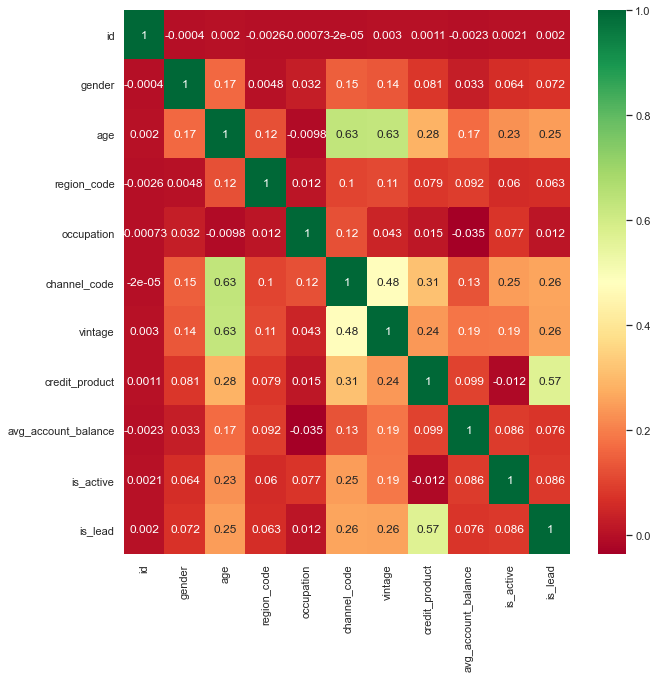

In [24]:
X = train.iloc[:,0:8]  #independent columns
y = train.iloc[:,-1]    #target column i.e Is_Active
#get correlations of each features in dataset
corrmat = train.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(method='pearson'),annot=True,cmap="RdYlGn")

Dropping some features with low correlation

In [25]:
train.drop('id', axis = 1, inplace=True) 
train.drop('region_code', axis = 1, inplace=True) 

In [26]:
train

,gender,age,occupation,channel_code,vintage,credit_product,avg_account_balance,is_active,is_lead
0,0,3,1,2,2,0,2,0,0
1,0,0,2,0,1,0,0,0,0
2,0,3,3,2,1,0,3,1,0
3,1,1,2,0,0,0,0,0,0
4,0,0,2,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...
245720,1,2,3,2,3,2,3,0,0
245721,1,0,2,0,0,0,1,1,0
245722,0,0,2,0,0,0,1,0,0
245723,0,0,2,0,1,0,0,0,0


## Now lets start building our model.

In [27]:
X = train.iloc[:,:-1] # X value contains all the variables except labels
y = train.iloc[:,-1] # these are the labels

We create the test train split first

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

We have now fit and transform the data into a scaler for accurate reading and results.

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

We have addressed the issue of oversampling here. 

In [30]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)

In [31]:
y_train.value_counts()


0    131307
1     40700
Name: is_lead, dtype: int64

In [32]:
pd.core.series.Series(y_balanced).value_counts()


1    131307
0    131307
Name: is_lead, dtype: int64

In [33]:
y_test.value_counts()

0    56130
1    17588
Name: is_lead, dtype: int64

In [34]:
pd.core.series.Series(y_test_balanced).value_counts()


1    56130
0    56130
Name: is_lead, dtype: int64

We notice in the value counts above that label types are now balanced, that is the problem of oversampling is solved now.
We will now implement decision tree algorithm 

First we will do grid search to get the best parameters

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_depth':list(range(0,30)),
          'criterion' : ["gini", "entropy"],
          'max_features' : ["int","float","None", "auto", "sqrt", "log2"]
         }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)
grid_search_cv.fit(X_balanced, y_balanced)
model = grid_search_cv.best_estimator_


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  1.4min finished


Training the model based on above parameters

In [39]:
model = grid_search_cv.best_estimator_
print(model)

DecisionTreeClassifier(criterion='entropy', max_depth=27, max_features='log2')


In [40]:
train_scores = []
test_scores = []

tic = time.perf_counter()
model.fit(X_balanced, y_balanced)
train_score = model.score(X_balanced, y_balanced)
train_scores.append(train_score)
test_score = model.score(X_test_balanced, y_test_balanced)
test_scores.append(test_score)
toc = time.perf_counter()
print(toc-tic)

#Train Accuracy
from sklearn.metrics import roc_auc_score
print("TRAINING ACCURACY: ", roc_auc_score(y_balanced, model.predict_proba(X_balanced)[:, 1]))

#Test Accuracy
from sklearn.metrics import roc_auc_score
print("TESTING ACCURACY: ", roc_auc_score(y_test_balanced, model.predict_proba(X_test_balanced)[:, 1]))

# Save the model as a pickle in a file
import joblib
joblib.dump(model, 'CCLD.pkl')


0.3239920999999981
TRAINING ACCURACY:  0.8982506336060001
TESTING ACCURACY:  0.8772571680443667


['CCLD.pkl']

In [50]:
# MAKING A FUNCTION FOR PREDICTION
def prediction(test): #enter the file as a data frame
    IDlite = np.array(test['id'])
    le = LabelEncoder()
    test.drop('region_code', axis = 1, inplace=True) 
    for x in test:
        if test[x].dtypes=='object':
            test[x] = le.fit_transform(test[x].astype(str))
    test = test.iloc[:,1:] # X value contains all the variables except ID
    mms = MinMaxScaler()
    test = pd.DataFrame(mms.fit_transform(test), columns=test.columns)
    test = np.array(test)
    # Load the model from the file
    model = joblib.load('CCLD.pkl') 
    # Use the loaded model to make predictions
    a = model.predict(test)
    return IDlite, a

In [51]:
test

,id,gender,age,region_code,occupation,channel_code,vintage,credit_product,avg_account_balance,is_active
0,94233,1,0,4,1,0,1,1,1,0
1,28747,1,1,18,1,1,2,2,2,0
2,94883,1,1,20,2,0,0,0,0,0
3,90941,1,0,22,1,0,2,0,1,0
4,87803,0,0,20,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
105307,33196,1,2,18,2,1,3,1,3,1
105308,31821,1,3,27,1,1,3,1,2,0
105309,52132,1,1,4,2,3,0,0,3,0
105310,1477,1,2,4,1,2,3,0,1,1


## MAKING PREDICTION AND SAVING INTO Solution.csv

In [52]:
ID, Is_Lead = prediction(test) #getting ID and Is_Lead

#making a data frame
import pandas as pd
import numpy as np
dataset = pd.DataFrame({'ID': ID, 'Is_Lead': list(Is_Lead)}, columns=['ID', 'Is_Lead'])

#saving the data frame as csv
dataset.to_csv(path_or_buf='Solution.csv', sep=',', index=None)

        gender  age  occupation  channel_code  vintage  credit_product  \
0            1    0           1             0        1               1   
1            1    1           1             1        2               2   
2            1    1           2             0        0               0   
3            1    0           1             0        2               0   
4            0    0           1             0        0               0   
...        ...  ...         ...           ...      ...             ...   
105307       1    2           2             1        3               1   
105308       1    3           1             1        3               1   
105309       1    1           2             3        0               0   
105310       1    2           1             2        3               0   
105311       1    0           2             0        1               0   

        avg_account_balance  is_active  
0                         1          0  
1                         2  

Entire code:

In [63]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import joblib
# Print versions of libraries
print(f"Numpy version : Numpy {np.__version__}")
print(f"Pandas version : Pandas {pd.__version__}")
print(f"Seaborn version : Seaborn {sns.__version__}")
print(f"SkLearn version : SkLearn {sklearn.__version__}")
# Magic Functions for In-Notebook Display
%matplotlib inline
# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

#GETTING THE DATA
train = pd.read_csv('train.csv', encoding='latin_1')
# Converting all column names to lower case
train.columns = train.columns.str.lower()
 
test = pd.read_csv('test.csv', encoding='latin_1')
# Converting all column names to lower case
test.columns = test.columns.str.lower()
test.head()
print("")
print("SOME INSIGHTS ON WHAT KIND OF DATA ARE WE WORKING ON")
print("")
print("Information about the training data")
print("")
print(train.info())
print("")
print("Decription of the continuous features of training data")
print("")
print(train.describe())
print("")
print("")
print("")
print("Information about the testing data")
print("")
print(test.info())
print("")
print("Decription of the continuous features of testing data")
print("")
print(test.describe())
print("")
def training(train, test):
    #assign a third category to the missing data
    train['credit_product'].fillna('notassigned', inplace=True)
    test['credit_product'].fillna('notassigned', inplace=True)
    #Assigning range to the continuous data in both training and testing
    age = test['age'].values
    nage = []
    vintage = test['vintage'].values
    nvintage = []
    avg_account_balance = test['avg_account_balance'].values
    navg_account_balance = []
    for i in age:
      i = int(i)
      if i>=23 and i<=30:
        nage.append('agerange1')
      if i>30 and i<=43:
        nage.append('agerange2')
      if i>43 and i<=54:
        nage.append('agerange3')
      if i>54 and i<=85:
        nage.append('agerange4')
      if i>85:
        nage.append('agerange5')
    for j in vintage:
      j = int(j)
      if j>=7 and j<=20:
        nvintage.append('vintageagerange1')
      if j>20 and j<=32:
        nvintage.append('vintageagerange2')
      if j>32 and j<=73:
        nvintage.append('vintageagerange3')
      if j>73 and j<=135:
        nvintage.append('vintageagerange4')
      if j>135:
        nvintage.append('vintageagerange5')
    for k in avg_account_balance:
      k = int(k)
      if k>=20790 and k<=604310:
        v = 'balancerange1'
        navg_account_balance.append(v)
      if k>604310 and k<=894601:
        v = 'balancerange2'
        navg_account_balance.append(v)
      if k>894601 and k<=1366666:
        v = 'balancerange3'
        navg_account_balance.append(v)
      if k>1366666 and k<=10352009:
        v = 'balancerange4'
        navg_account_balance.append(v)
      if k>10352009:
        v = 'balancerange5'
        navg_account_balance.append(v)
    test['age']=nage
    test['vintage']=nvintage
    test['avg_account_balance']=navg_account_balance
    age = train['age'].values
    nage = []
    vintage = train['vintage'].values
    nvintage = []
    avg_account_balance = train['avg_account_balance'].values
    navg_account_balance = []
    for i in age:
      i = int(i)
      if i>=23 and i<=30:
        nage.append('agerange1')
      if i>30 and i<=43:
        nage.append('agerange2')
      if i>43 and i<=54:
        nage.append('agerange3')
      if i>54 and i<=85:
        nage.append('agerange4')
      if i>85:
        nage.append('agerange5')
    for j in vintage:
      j = int(j)
      if j>=7 and j<=20:
        nvintage.append('vintageagerange1')
      if j>20 and j<=32:
        nvintage.append('vintageagerange2')
      if j>32 and j<=73:
        nvintage.append('vintageagerange3')
      if j>73 and j<=135:
        nvintage.append('vintageagerange4')
      if j>135:
        nvintage.append('vintageagerange5')
    for k in avg_account_balance:
      k = int(k)
      if k>=20790 and k<=604310:
        v = 'balancerange1'
        navg_account_balance.append(v)
      if k>604310 and k<=894601:
        v = 'balancerange2'
        navg_account_balance.append(v)
      if k>894601 and k<=1366666:
        v = 'balancerange3'
        navg_account_balance.append(v)
      if k>1366666 and k<=10352009:
        v = 'balancerange4'
        navg_account_balance.append(v)
      if k>10352009:
        v = 'balancerange5'
        navg_account_balance.append(v)
    train['age']=nage
    train['vintage']=nvintage
    train['avg_account_balance']=navg_account_balance
    #Label Encoding our data.
    le = LabelEncoder()
    for x in train:
        if train[x].dtypes=='object':
            train[x] = le.fit_transform(train[x].astype(str))
    #Dropping some columns with low accuracy
    train.drop('id', axis = 1, inplace=True) 
    train.drop('region_code', axis = 1, inplace=True) 
    #Now lets start building our model.
    X = train.iloc[:,:-1] # X value contains all the variables except labels and ID
    y = train.iloc[:,-1] # these are the labels

    # We create the test train split first
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

    #We have now fit and transform the data into a scaler for accurate reading and results.
    mms = MinMaxScaler()
    X_scaled = pd.DataFrame(mms.fit_transform(X_train), columns=X_train.columns)
    X_test_scaled = pd.DataFrame(mms.transform(X_test), columns=X_test.columns)

    #Now we carryout oversampling to adjust the class distribution of a data set
    oversample = SMOTE()
    X_balanced, y_balanced = oversample.fit_resample(X_scaled, y_train)
    X_test_balanced, y_test_balanced = oversample.fit_resample(X_test_scaled, y_test)
    '''
    To get the best hyper-parameters for our model we are going to use GridSearchCV. Just uncomment the code below to get the best hyper
    # from sklearn.tree import DecisionTreeClassifier
    # from sklearn.model_selection import GridSearchCV
    # params = {'max_depth':list(range(0,30)),
    #           'criterion' : ["gini", "entropy"],
    #           'max_features' : ["int","float","None", "auto", "sqrt", "log2"]
    #          }
    # grid_search_cv = GridSearchCV(DecisionTreeClassifier(), params, verbose=1, cv=3)
    # grid_search_cv.fit(X_balanced, y_balanced)
    # model = grid_search_cv.best_estimator_
    # We will now train Decision tree model on the data.
    '''
    print("")
    print("Training Model")
    print("")
    import time #just to check how much time it takes to train
    train_scores = []
    test_scores = []
    tic = time.perf_counter()
    model = DecisionTreeClassifier(criterion='entropy', max_depth=27, max_features='log2')
    model.fit(X_balanced, y_balanced)
    toc = time.perf_counter() #time ends here
    print("it took {tt} seconds".format(tt=tic-toc))
    model.fit(X_balanced, y_balanced)
    toc = time.perf_counter() #time ends here
    print("it took {tt} seconds".format(tt=tic-toc))
    
    #Train Accuracy
    from sklearn.metrics import roc_auc_score
    print("TRAINING ACCURACY: ", roc_auc_score(y_balanced, model.predict_proba(X_balanced)[:, 1]))
    
    #Test Accuracy
    from sklearn.metrics import roc_auc_score
    print("TESTING ACCURACY: ", roc_auc_score(y_test_balanced, model.predict_proba(X_test_balanced)[:, 1]))

    # Save the model as a pickle in a file
    return model

# MAKING A FUNCTION FOR PREDICTION
def prediction(test, model): #enter the file as a data frame'
    print("")
    print("PROCESSING THE DATA TO BE PREDICTED")
    IDlite = np.array(test['id'])
    le = LabelEncoder()
    test.drop('region_code', axis = 1, inplace=True) 
    for x in test:
        if test[x].dtypes=='object':
            test[x] = le.fit_transform(test[x].astype(str))
    test = test.iloc[:,1:] # X value contains all the variables except ID
    mms = MinMaxScaler()
    test = pd.DataFrame(mms.fit_transform(test), columns=test.columns)
    test = np.array(test)
    # Use the loaded model to make predictions
    a = model.predict(test)
    print("Completed.")
    return IDlite, a

#training the model and getting the predictions
model = training(train, test)
ID, Is_Lead = prediction(test, model) #getting ID and Is_Lead

#making a data frame
import pandas as pd
import numpy as np
dataset = pd.DataFrame({'ID': ID, 'Is_Lead': list(Is_Lead)}, columns=['ID', 'Is_Lead'])

#saving the data frame as csv
dataset.to_csv(path_or_buf='Solution.csv', sep=',', index=None)

Numpy version : Numpy 1.20.3
Pandas version : Pandas 1.1.3
Seaborn version : Seaborn 0.11.0
SkLearn version : SkLearn 0.23.1

SOME INSIGHTS ON WHAT KIND OF DATA ARE WE WORKING ON

Information about the training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   245725 non-null  object
 1   gender               245725 non-null  object
 2   age                  245725 non-null  int64 
 3   region_code          245725 non-null  object
 4   occupation           245725 non-null  object
 5   channel_code         245725 non-null  object
 6   vintage              245725 non-null  int64 
 7   credit_product       216400 non-null  object
 8   avg_account_balance  245725 non-null  int64 
 9   is_active            245725 non-null  object
 10  is_lead              245725 non-null  int64 
dtypes: int64(4), obje